In [149]:
import pandas as pd
import numpy as np

In [150]:
dataset_name = '1063'
time_split = '5m'
csv_file_path = f'/home/cc/clio/runs/raw/tencent/characteristic/{dataset_name}/{time_split}/characteristic.csv'
df_data = pd.read_csv(csv_file_path)
df_data

,num_io,start_time,end_time,ts_unit,duration,read_count,write_count,read_ratio,write_ratio,read_write_ratio,...,write_iat_p60,write_iat_p70,write_iat_p75,write_iat_p80,write_iat_p90,write_iat_p95,write_iat_p99,write_iat_p999,write_iat_p9999,write_iat_p100
0,260480,2.016100e+00,2.999997e+05,ms,299997.6642,194995,65485,0.7486,0.2514,2.9777,...,2.953084,3.793574e+00,4.365364e+00,5.102098e+00,7.790740e+00,1.143308e+01,3.311300e+01,5.722898e+02,1.835276e+03,2.140545e+03
1,253250,3.000000e+05,5.999987e+05,ms,299998.7419,184620,68630,0.7290,0.2710,2.6901,...,2.915006,3.703629e+00,4.228828e+00,4.895827e+00,7.297898e+00,1.066958e+01,3.364905e+01,5.622336e+02,1.467428e+03,1.810141e+03
2,252875,6.000000e+05,8.999989e+05,ms,299998.8543,193668,59207,0.7659,0.2341,3.2710,...,3.206072,4.093453e+00,4.690381e+00,5.454113e+00,8.297296e+00,1.233594e+01,4.324925e+01,6.880434e+02,1.681611e+03,1.867603e+03
3,246044,9.000000e+05,1.200000e+06,ms,299999.7081,175385,70659,0.7128,0.2872,2.4821,...,3.172572,4.030533e+00,4.602380e+00,5.320157e+00,7.843508e+00,1.101543e+01,2.700936e+01,3.790219e+02,1.371199e+03,1.660979e+03
4,122960,1.200000e+06,1.499626e+06,ms,299626.2003,89025,33935,0.7240,0.2760,2.6234,...,2.998570,3.801168e+00,4.372131e+00,5.151681e+00,8.828791e+00,1.800891e+01,1.841683e+02,1.534532e+03,2.337945e+03,2.523118e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,68225,7.800000e+08,7.802990e+08,ms,299000.0000,53225,15000,0.7801,0.2199,3.5483,...,3.457726,4.655521e+00,5.638195e+00,7.214758e+00,1.808998e+01,5.520005e+01,6.963765e+02,2.758481e+03,3.161796e+03,3.161796e+03
2580,36526,7.803000e+08,7.805990e+08,ms,299034.4132,29589,6937,0.8101,0.1899,4.2654,...,4.910515,8.074455e+00,1.121602e+01,1.683063e+01,6.357741e+01,2.248520e+02,1.643059e+03,3.067555e+03,3.286244e+03,3.286244e+03
2581,33518,7.806000e+08,7.809000e+08,ms,299996.4019,24710,8808,0.7372,0.2628,2.8054,...,4.206833,6.801370e+00,9.433852e+00,1.416790e+01,5.284958e+01,1.842704e+02,1.230383e+03,2.129429e+03,2.641863e+03,2.641863e+03
2582,57587,7.809000e+08,7.811998e+08,ms,299787.1000,43538,14049,0.7560,0.2440,3.0990,...,3.470809,4.865339e+00,6.099718e+00,8.145087e+00,2.359417e+01,7.783616e+01,8.386994e+02,2.045492e+03,2.275491e+03,2.275491e+03


# 1. Visualization of Data

In [151]:
import matplotlib.pyplot as plt

# Define categories and slice each category for visualization
categories = ['iops', 'read_write_ratio', 'write_size_ratio']
start_index = 0
end_index = 1200

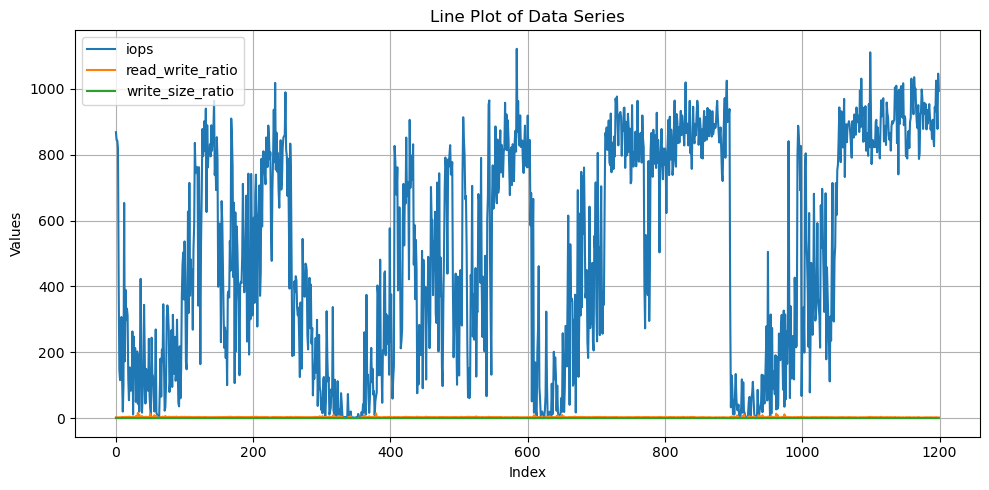

In [152]:
# Iterate through each category and plot
plt.figure(figsize=(10, 5))

for category in categories:
    data = df_data[category].iloc[start_index:end_index]  # Slice data for the current category
    plt.plot(data.index, data.values, label=category)

plt.title('Line Plot of Data Series')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

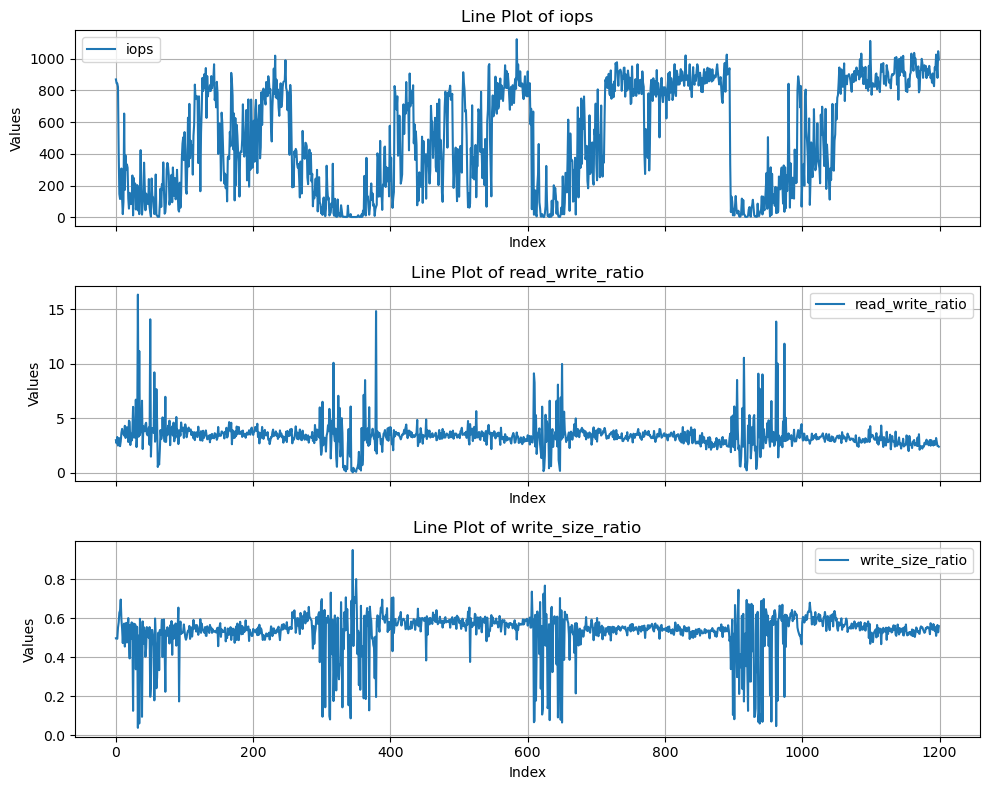

In [153]:
fig, axs = plt.subplots(len(categories), 1, figsize=(10, 8), sharex=True)

# Iterate through each category and plot in separate subplot
for idx, category in enumerate(categories):
    data = df_data[category].iloc[start_index:end_index]  # Slice data for the current category
    axs[idx].plot(data.index, data.values, label=category)
    axs[idx].set_title(f'Line Plot of {category}')
    axs[idx].set_xlabel('Index')
    axs[idx].set_ylabel('Values')
    axs[idx].legend()
    axs[idx].grid(True)

plt.tight_layout()
plt.show()

# 2. Univariate Feature Drift Detection

## 2.1 Drift Detection

In [154]:
from alibi_detect.cd import CVMDrift

# select feature category, window length and step size
category = 'iops'
window_len = 120
step_size = 60

In [155]:
ref_start = 0
ref_end = window_len
start = window_len
end = start + window_len
preds = []

while end < len(df_data):
    data_ref = df_data[category].iloc[ref_start:ref_end].to_numpy()
    cd = CVMDrift(data_ref, p_val=0.005)

    x = df_data[category].iloc[start:end].to_numpy()
    pred = cd.predict(x, drift_type='feature', return_p_val=True, return_distance=True)
    preds.append(pred)
    
    ref_start += step_size
    ref_end = ref_start + window_len
    start += step_size
    end = start + window_len
    

In [156]:
# Initialize lists to store data for plotting
window_indices = []
is_drift_values = []
p_val_values = []
distance_values = []
threshold_values = []

# Extract data for each prediction in preds
for idx, pred in enumerate(preds):
    window_indices.append(idx + 1)  # Assuming window index starts from 1
    is_drift_values.append(pred['data']['is_drift'][0])
    p_val_values.append(pred['data']['p_val'][0])
    distance_values.append(pred['data']['distance'][0])
    threshold_values.append(pred['data']['threshold'])

# Create a DataFrame from the lists
data_dict = {
    'Window_Index': window_indices,
    'Is_Drift': is_drift_values,
    'P_Value': p_val_values,
    'Distance': distance_values,
    'Threshold': threshold_values
}

df_preds = pd.DataFrame(data_dict)
df_preds

,Window_Index,Is_Drift,P_Value,Distance,Threshold
0,1,1,2.392583e-09,10.143333,0.005
1,2,0,4.396410e-02,0.483194,0.005
2,3,1,1.343023e-09,9.808194,0.005
3,4,1,9.051815e-11,10.481944,0.005
4,5,1,4.131622e-08,3.113333,0.005
5,6,1,1.112231e-09,9.703472,0.005
6,7,1,3.663636e-11,4.907917,0.005
7,8,1,2.259219e-05,1.887083,0.005
8,9,1,6.576427e-10,5.715625,0.005
9,10,1,2.708103e-04,1.412500,0.005


In [157]:
num_drifts = df_preds['Is_Drift'].sum()
print(f'Number of drifts detected: {num_drifts}')


Number of drifts detected: 38


In [158]:
# Get drift_window_indices and no_drift_window_indices from DataFrame
drift_window_indices = df_preds[df_preds['Is_Drift'] == 1]['Window_Index'].tolist()
no_drift_window_indices = df_preds[df_preds['Is_Drift'] == 0]['Window_Index'].tolist()

## 2.2 Visualization of Prediction

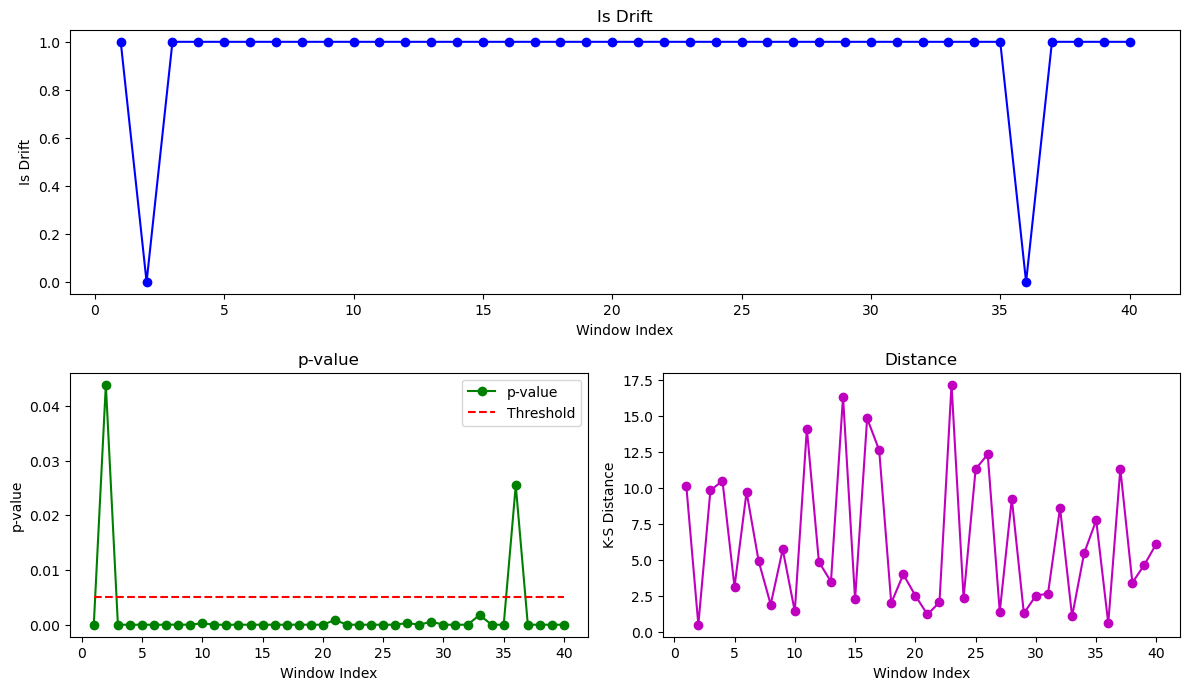

In [159]:
# Visualization example
plt.figure(figsize=(12, 10))

# Plot is_drift
plt.subplot(3, 1, 1)
plt.plot(window_indices, is_drift_values, marker='o', linestyle='-', color='b')
plt.title('Is Drift')
plt.xlabel('Window Index')
plt.ylabel('Is Drift')

# Plot p_val
plt.subplot(3, 2, 3)
plt.plot(window_indices, p_val_values, marker='o', linestyle='-', color='g', label='p-value')
plt.plot(window_indices, threshold_values, linestyle='--', color='r', label='Threshold')
plt.title('p-value')
plt.xlabel('Window Index')
plt.ylabel('p-value')
plt.legend()

# Plot distance
plt.subplot(3, 2, 4)
plt.plot(window_indices, distance_values, marker='o', linestyle='-', color='m')
plt.title('Distance')
plt.xlabel('Window Index')
plt.ylabel('K-S Distance')

plt.tight_layout()
plt.show()

In [160]:
drift_index = 12

if drift_index in drift_window_indices:
    print(f'Window {drift_index} is a drift window')

Window 12 is a drift window


Distance: 4.842080116271973
P-value: 3.038702622859546e-11


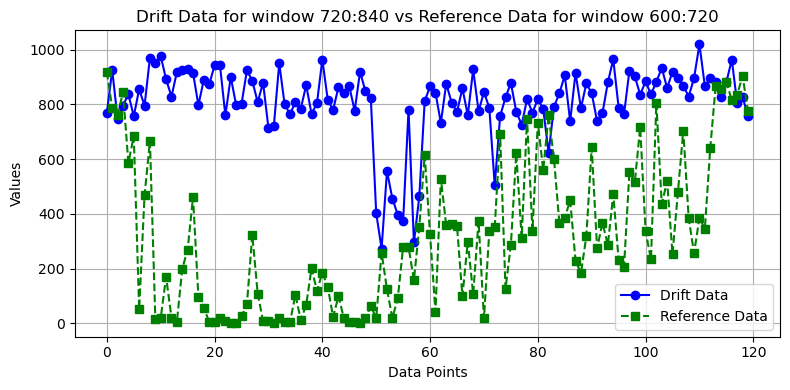

In [161]:
indices = np.arange(window_len)  # Assuming x-axis is indexed by data points

start = drift_index * step_size
end = start + window_len
ref_start = start - window_len
ref_end = start
drift_data = df_data[category].iloc[start:end].to_numpy()
data_ref = df_data[category].iloc[ref_start:ref_end].to_numpy()

# Calculate rounded values for distance and keyvalue
rounded_distance = round(distance_values[drift_index - 1], 5)
rounded_keyvalue = p_val_values[drift_index - 1]

print(f'Distance: {rounded_distance}')
print(f'P-value: {rounded_keyvalue}')

# Plotting both drift data and reference data
plt.figure(figsize=(8, 4))
plt.plot(indices, drift_data, marker='o', linestyle='-', color='b', label='Drift Data')
plt.plot(indices, data_ref, marker='s', linestyle='--', color='g', label='Reference Data')
plt.title(f'Drift Data for window {start}:{end} vs Reference Data for window {ref_start}:{ref_end}')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2.3 Visualization of Prediction by Ranking

In [162]:
# Rank the p-values from lowest to highest
df_sorted_pval = df_preds.sort_values(by='P_Value')

# Select the top five p-values and their corresponding window indices
top_five_drifts = df_sorted_pval.head(5)

top_five_drifts

,Window_Index,Is_Drift,P_Value,Distance,Threshold
39,40,1,1.247358e-11,6.121389,0.005
38,39,1,2.661216e-11,4.655226,0.005
11,12,1,3.038703e-11,4.842083,0.005
6,7,1,3.663636e-11,4.907917,0.005
3,4,1,9.051815e-11,10.481944,0.005


In [163]:
# Select the bottom five p-values and their corresponding window indices
top_five_non_drifts = df_sorted_pval.tail(5)

top_five_non_drifts

,Window_Index,Is_Drift,P_Value,Distance,Threshold
28,29,1,0.000558,1.276111,0.005
20,21,1,0.000864,1.193750,0.005
32,33,1,0.001773,1.059722,0.005
35,36,0,0.025524,0.576823,0.005
1,2,0,0.043964,0.483194,0.005


In [164]:
# Function to visualize drift data for given window indices
def visualize(window_indices, step_size, window_len, df_data, category='iops', visualize_type='Drift'):
    for window_index in window_indices:
        start = window_index * step_size
        end = start + window_len
        ref_start = start - window_len
        ref_end = start
        drift_data = df_data[category].iloc[start:end].to_numpy()
        data_ref = df_data[category].iloc[ref_start:ref_end].to_numpy()
        
        plt.figure(figsize=(8, 4))
        indices = np.arange(len(drift_data))  # Assuming x-axis is indexed by data points
        plt.plot(indices, drift_data, marker='o', linestyle='-', color='b', label=f'{visualize_type} Data Window {window_index}')
        plt.plot(indices, data_ref, marker='s', linestyle='--', color='g', label='Reference Data')
        plt.title(f'Drift Data for Window Index {window_index} ({start}:{end})')
        plt.xlabel('Data Points')
        plt.ylabel('Values')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

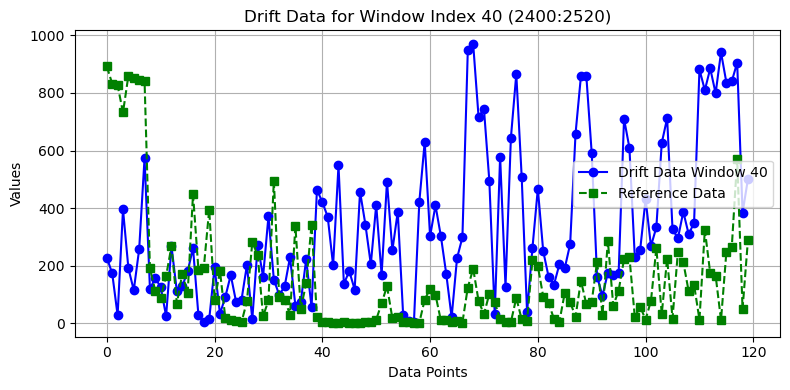

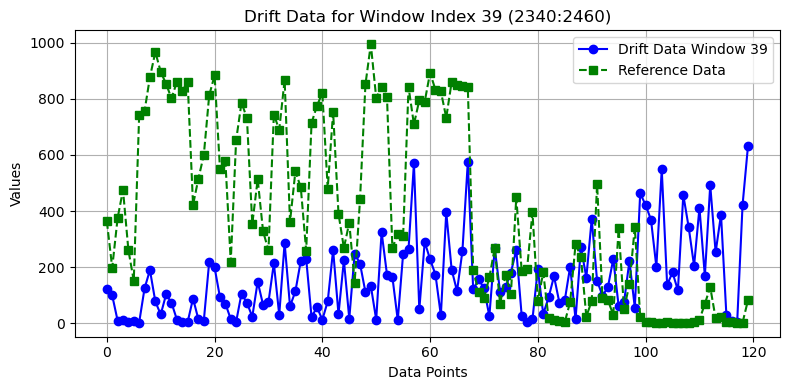

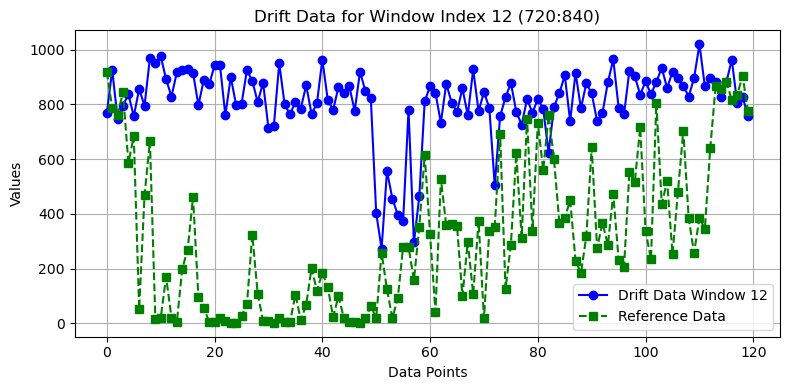

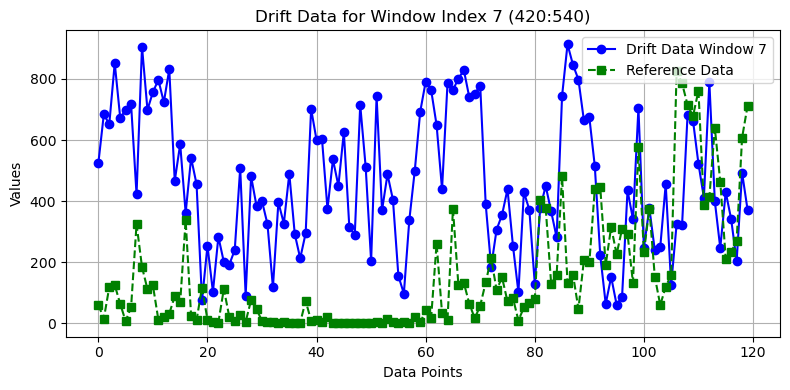

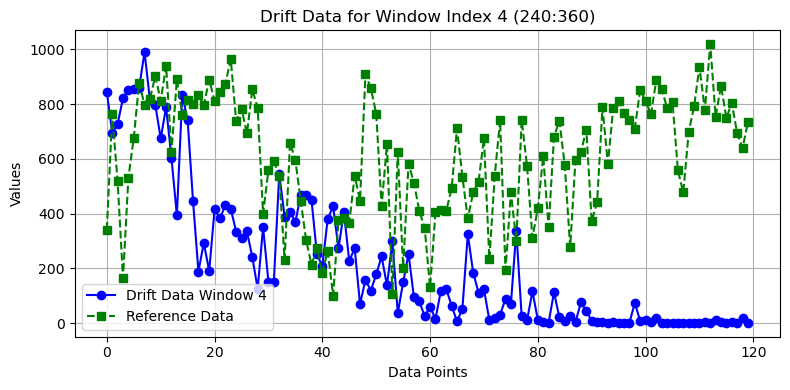

In [165]:
visualize(top_five_drifts['Window_Index'].tolist(), step_size, window_len, df_data, visualize_type='Drift')

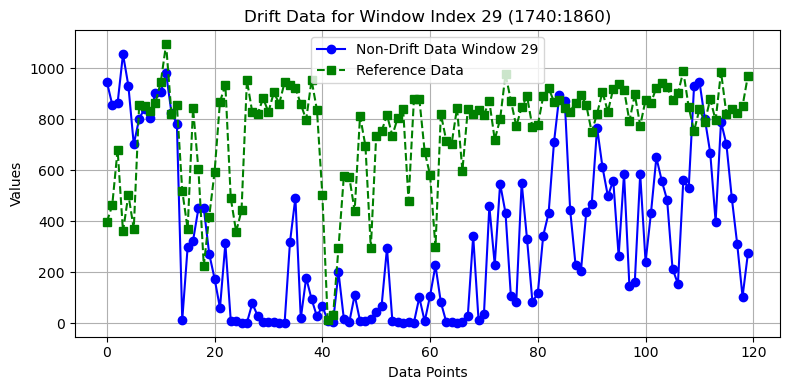

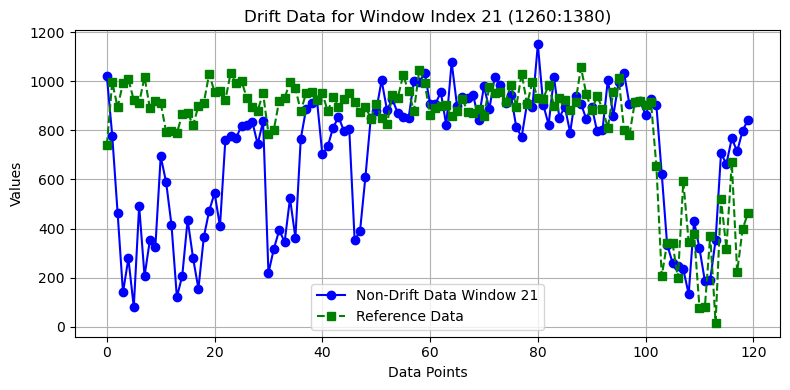

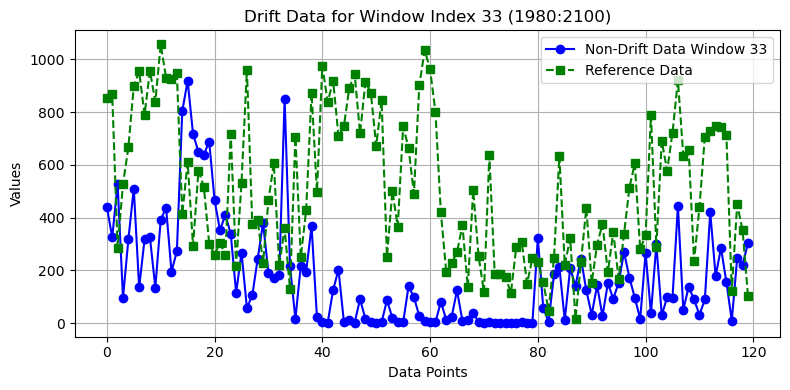

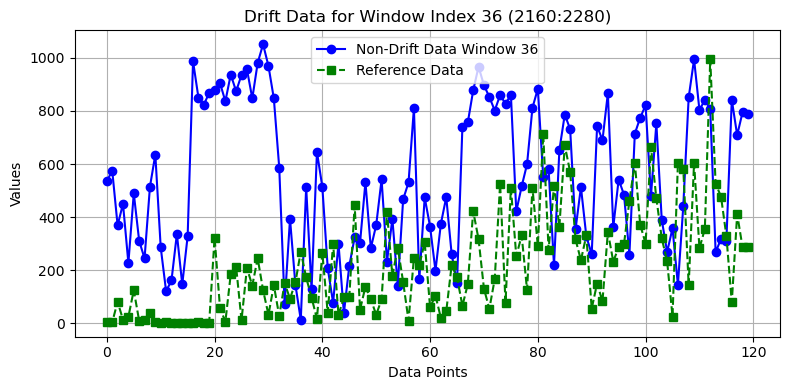

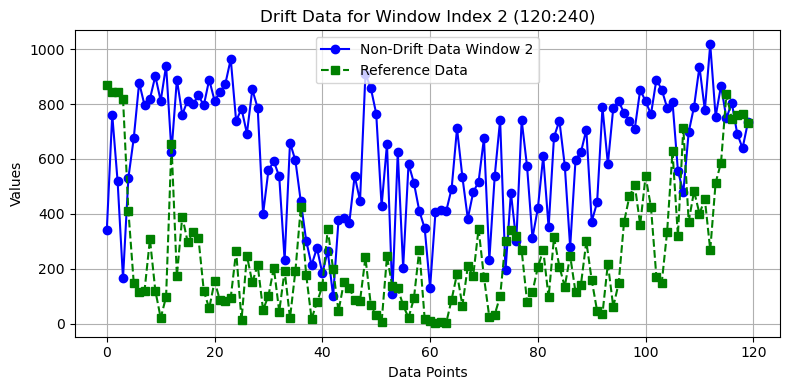

In [166]:
visualize(top_five_non_drifts['Window_Index'].tolist(), step_size, window_len, df_data, visualize_type='Non-Drift')

# 3. Multivariate Feature Drift Detection

## 3.1 Drift Detection

In [167]:
# select feature category, window length and step size
categories = ['iops', 'read_write_ratio', 'write_size_ratio']
window_len = 120
step_size = 60

In [168]:
start = window_len
end = start + window_len
ref_start = 0
ref_end = window_len
preds = []

while end < len(df_data):
    # select reference data
    data_ref = df_data[categories].iloc[ref_start:ref_end].to_numpy()
    cd = CVMDrift(data_ref, p_val=0.005, correction='fdr')

    x = df_data[categories].iloc[start:end].to_numpy()
    pred = cd.predict(x, drift_type='batch', return_p_val=True, return_distance=True)
    preds.append(pred)
    
    start += step_size
    end = start + window_len
    ref_start += step_size
    ref_end = ref_start + window_len

In [169]:
# Initialize lists to store data for plotting
window_indices = []
is_drift_values = []
p_val_values = []
distance_values = []
threshold_values = []

# Extract data for each prediction in preds
for idx, pred in enumerate(preds):
    window_indices.append(idx + 1)  # Assuming window index starts from 1
    is_drift_values.append(pred['data']['is_drift'])
    p_val_values.append(pred['data']['p_val'])
    distance_values.append(pred['data']['distance'])
    threshold_values.append(pred['data']['threshold'])

# Create a DataFrame from the lists
data_dict = {
    'Window_Index': window_indices,
    'Is_Drift': is_drift_values,
    'P_Value': p_val_values,
    'Distance': distance_values,
    'Threshold': threshold_values
}

df_preds = pd.DataFrame(data_dict)
df_preds

,Window_Index,Is_Drift,P_Value,Distance,Threshold
0,1,1,"[2.392583e-09, 0.0062209466, 0.0018151004]","[10.143333, 0.8287847, 1.0553125]",0.003333
1,2,1,"[0.0439641, 0.040663008, 0.0010665766]","[0.48319444, 0.4964757, 1.1543924]",0.001667
2,3,1,"[1.3430229e-09, 3.5704165e-08, 1.418916e-09]","[9.808194, 3.1419618, 3.7878647]",0.005
3,4,1,"[9.051815e-11, 7.858839e-06, 4.293119e-05]","[10.481944, 2.0907466, 1.76375]",0.005
4,5,1,"[4.1316223e-08, 5.810667e-05, 0.0039380197]","[3.1133332, 1.7057465, 0.91230905]",0.005
5,6,1,"[1.1122305e-09, 6.892099e-07, 1.4784685e-05]","[9.703472, 2.5631945, 1.96875]",0.005
6,7,1,"[3.663636e-11, 0.217411, 0.018958267]","[4.9079165, 0.22973958, 0.6289757]",0.001667
7,8,1,"[2.2592189e-05, 2.4797607e-06, 0.0014772668]","[1.8870833, 2.314184, 1.0936111]",0.005
8,9,1,"[6.576427e-10, 0.014902796, 4.9851856e-09]","[5.715625, 0.67159724, 3.529427]",0.003333
9,10,1,"[0.00027081027, 4.780424e-06, 1.0169554e-10]","[1.4125, 2.186927, 5.1855035]",0.005


In [170]:
num_drifts = df_preds['Is_Drift'].sum()
print(f'Number of drifts detected: {num_drifts}')

Number of drifts detected: 39


In [171]:
# Get drift_window_indices and no_drift_window_indices from DataFrame
drift_window_indices = df_preds[df_preds['Is_Drift'] == 1]['Window_Index'].tolist()
no_drift_window_indices = df_preds[df_preds['Is_Drift'] == 0]['Window_Index'].tolist()

## 3.2 Visualization of Predictions

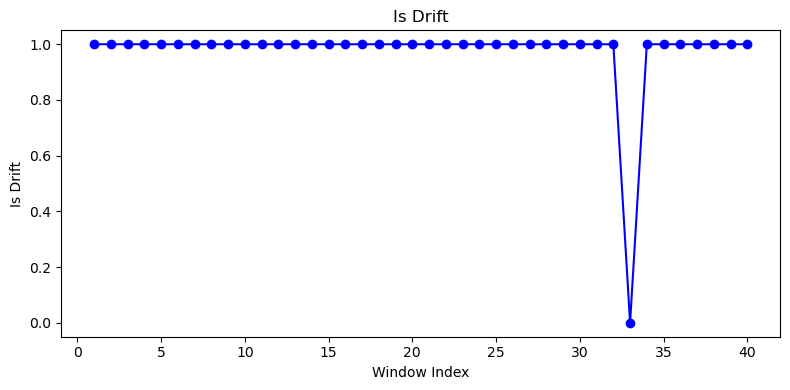

In [172]:
# Visualization example
plt.figure(figsize=(8, 4))

# Plot is_drift
plt.plot(window_indices, is_drift_values, marker='o', linestyle='-', color='b')
plt.title('Is Drift')
plt.xlabel('Window Index')
plt.ylabel('Is Drift')

plt.tight_layout()
plt.show()

In [173]:
drift_index = 12

if drift_index in drift_window_indices:
    print(f'Window {drift_index} is a drift window')

Window 12 is a drift window


In [174]:
data_ref.shape

(120, 3)

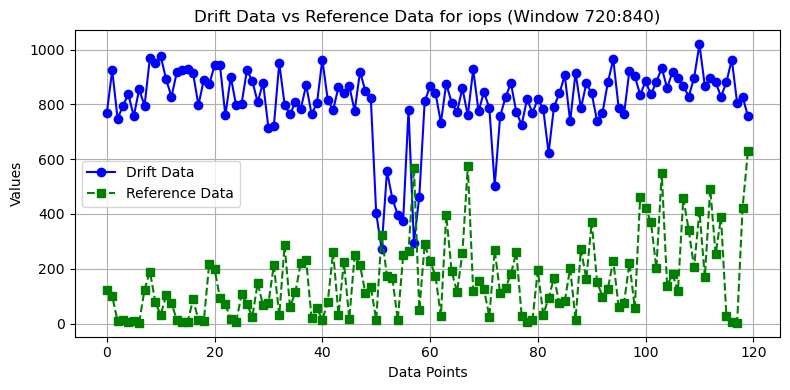

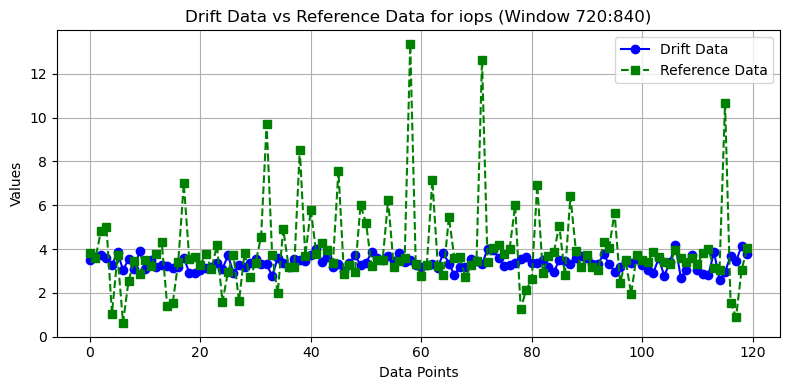

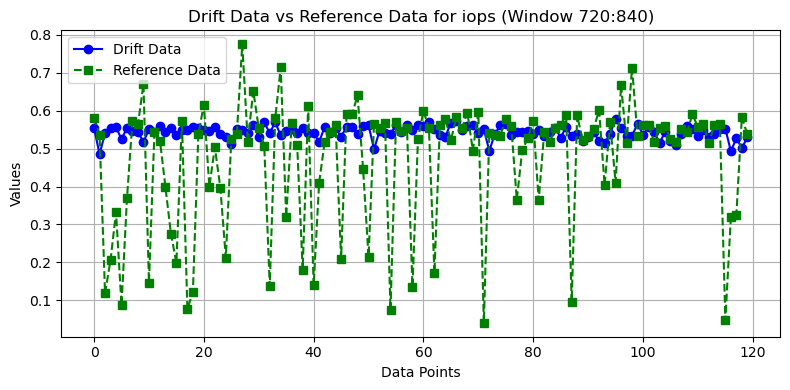

In [175]:
indices = np.arange(window_len)  

for idx, cate in enumerate(categories):
    start = drift_index * step_size
    end = start + window_len
    drift_data = df_data[cate].iloc[start:end].to_numpy()
    reference_data = data_ref[:,idx]

    # Plotting both drift data and reference data
    plt.figure(figsize=(8, 4))
    plt.plot(indices, drift_data, marker='o', linestyle='-', color='b', label='Drift Data')
    plt.plot(indices, reference_data, marker='s', linestyle='--', color='g', label='Reference Data')
    plt.title(f'Drift Data vs Reference Data for {category} (Window {start}:{end})')
    plt.xlabel('Data Points')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## 3.3 Check single feature

In [176]:
p_values = pd.DataFrame(np.vstack(df_preds['P_Value'].values),columns=categories)
p_values

,iops,read_write_ratio,write_size_ratio
0,2.392583e-09,6.220947e-03,1.815100e-03
1,4.396410e-02,4.066301e-02,1.066577e-03
2,1.343023e-09,3.570416e-08,1.418916e-09
3,9.051815e-11,7.858839e-06,4.293119e-05
4,4.131622e-08,5.810667e-05,3.938020e-03
5,1.112231e-09,6.892099e-07,1.478468e-05
6,3.663636e-11,2.174110e-01,1.895827e-02
7,2.259219e-05,2.479761e-06,1.477267e-03
8,6.576427e-10,1.490280e-02,4.985186e-09
9,2.708103e-04,4.780424e-06,1.016955e-10


In [177]:
iops_p_values = p_values['iops'].sort_values().index[:5]
read_write_ratio_p_values = p_values['read_write_ratio'].sort_values().index[:5]
write_size_ratio_p_values = p_values['write_size_ratio'].sort_values().index[:5]

overlap_high_p_value_indices = iops_p_values.intersection(read_write_ratio_p_values).intersection(write_size_ratio_p_values)
overlap_high_p_value_indices

Index([], dtype='int64')

In [178]:
iops_low_p_values = p_values['iops'].sort_values(ascending=False).index[:5]
read_write_ratio_low_p_values = p_values['read_write_ratio'].sort_values(ascending=False).index[:5]
write_size_ratio_low_p_values = p_values['write_size_ratio'].sort_values(ascending=False).index[:5]

overlap_low_p_value_indices = iops_low_p_values.intersection(read_write_ratio_low_p_values).intersection(write_size_ratio_low_p_values)
overlap_low_p_value_indices

Index([], dtype='int64')

# 4. Save Results

In [179]:
p_values_cate = [f'{cate}_pval' for cate in categories]
distance_cate = [f'{cate}_distance' for cate in categories]
p_vals = pd.DataFrame(np.vstack(df_preds['P_Value'].values), columns=p_values_cate)
distances = pd.DataFrame(np.vstack(df_preds['Distance'].values), columns=distance_cate)

In [180]:
df_results = pd.concat([df_preds[['Window_Index', 'Is_Drift']], p_vals, distances], axis=1)
df_results

,Window_Index,Is_Drift,iops_pval,read_write_ratio_pval,write_size_ratio_pval,iops_distance,read_write_ratio_distance,write_size_ratio_distance
0,1,1,2.392583e-09,6.220947e-03,1.815100e-03,10.143333,0.828785,1.055313
1,2,1,4.396410e-02,4.066301e-02,1.066577e-03,0.483194,0.496476,1.154392
2,3,1,1.343023e-09,3.570416e-08,1.418916e-09,9.808194,3.141962,3.787865
3,4,1,9.051815e-11,7.858839e-06,4.293119e-05,10.481944,2.090747,1.763750
4,5,1,4.131622e-08,5.810667e-05,3.938020e-03,3.113333,1.705747,0.912309
5,6,1,1.112231e-09,6.892099e-07,1.478468e-05,9.703472,2.563195,1.968750
6,7,1,3.663636e-11,2.174110e-01,1.895827e-02,4.907917,0.229740,0.628976
7,8,1,2.259219e-05,2.479761e-06,1.477267e-03,1.887083,2.314184,1.093611
8,9,1,6.576427e-10,1.490280e-02,4.985186e-09,5.715625,0.671597,3.529427
9,10,1,2.708103e-04,4.780424e-06,1.016955e-10,1.412500,2.186927,5.185503


In [181]:
df_results['overlapped_pvals_drift'] = 0
df_results.loc[overlap_high_p_value_indices, 'overlapped_pvals_drift'] = 1

df_results['overlapped_pvals_nondrift'] = 0
df_results.loc[overlap_low_p_value_indices, 'overlapped_pvals_nondrift'] = 1

In [182]:
for cate in categories:
    high_p_values_indices = p_values[cate].sort_values().index[:4]
    low_p_values_indices = p_values[cate].sort_values(ascending=False).index[:4]
    
    df_results[f'{cate}_pval_drift'] = 0
    df_results.loc[high_p_values_indices, f'{cate}_pval_drift'] = 1

    df_results[f'{cate}_pval_nondrift'] = 0
    df_results.loc[low_p_values_indices, f'{cate}_pval_nondrift'] = 1

In [183]:
index_arr = np.zeros((len(df_results), 2), dtype=int)

index_arr[:, 0] = np.arange(len(df_results)) * step_size
index_arr[:, 1] = index_arr[:, 0] + window_len * 2

index_arr[-1, -1] = min(len(df_data), index_arr[-1, -1])

index_df = pd.DataFrame(index_arr, columns=['start', 'end'])

In [184]:
df_results = pd.concat([df_results, index_df], axis=1)
df_results.head(10)

,Window_Index,Is_Drift,iops_pval,read_write_ratio_pval,write_size_ratio_pval,iops_distance,read_write_ratio_distance,write_size_ratio_distance,overlapped_pvals_drift,overlapped_pvals_nondrift,iops_pval_drift,iops_pval_nondrift,read_write_ratio_pval_drift,read_write_ratio_pval_nondrift,write_size_ratio_pval_drift,write_size_ratio_pval_nondrift,start,end
0,1,1,2.392583e-09,6.220947e-03,1.815100e-03,10.143333,0.828785,1.055313,0,0,0,0,0,0,0,0,0,240
1,2,1,4.396410e-02,4.066301e-02,1.066577e-03,0.483194,0.496476,1.154392,0,0,0,1,0,0,0,0,60,300
2,3,1,1.343023e-09,3.570416e-08,1.418916e-09,9.808194,3.141962,3.787865,0,0,0,0,0,0,0,0,120,360
3,4,1,9.051815e-11,7.858839e-06,4.293119e-05,10.481944,2.090747,1.763750,0,0,0,0,0,0,0,0,180,420
4,5,1,4.131622e-08,5.810667e-05,3.938020e-03,3.113333,1.705747,0.912309,0,0,0,0,0,0,0,0,240,480
5,6,1,1.112231e-09,6.892099e-07,1.478468e-05,9.703472,2.563195,1.968750,0,0,0,0,0,0,0,0,300,540
6,7,1,3.663636e-11,2.174110e-01,1.895827e-02,4.907917,0.229740,0.628976,0,0,1,0,0,1,0,0,360,600
7,8,1,2.259219e-05,2.479761e-06,1.477267e-03,1.887083,2.314184,1.093611,0,0,0,0,0,0,0,0,420,660
8,9,1,6.576427e-10,1.490280e-02,4.985186e-09,5.715625,0.671597,3.529427,0,0,0,0,0,0,0,0,480,720
9,10,1,2.708103e-04,4.780424e-06,1.016955e-10,1.412500,2.186927,5.185503,0,0,0,0,0,0,0,0,540,780


In [185]:
save_path = f'/home/cc/clio/drift-detection/output/cramer_drift_results_{dataset_name}_{time_split}.csv'

df_results.to_csv(save_path, index=False)